# Grupo 1
Integrantes:Laura S. Gomez Velazquez, Sofia Vaucelles, María Candela Herrera,

# Introducción
La clusterización es una técnica de aprendizaje automático no supervisado que busca agrupar datos en subconjuntos o clústeres, donde los datos dentro de cada clúster son más similares entre sí. En el contexto de pozos de hidrocarburos, la clusterización puede ser una herramienta para identificar patrones y segmentar los pozos según sus características operativas, geológicas y de rendimiento.

La segmentación de pozos mediante clusterización permite identificar grupos de pozos con comportamientos similares, lo que puede ser útil para:

Optimizar las estrategias de fractura: Al identificar grupos de pozos con características similares, se pueden aplicar estrategias de fractura más eficientes y adaptadas a cada grupo.

Asignar recursos de manera más efectiva: Conocer los grupos de pozos que requieren más atención o que tienen el mayor potencial puede ayudar a asignar recursos de manera más eficaz.

Prever y mitigar problemas: Detectar patrones puede ayudar a prever problemas operacionales o de rendimiento antes de que ocurran.

El dataset utilizado para este análisis es de Datos de fractura de pozos de hidrocarburos y fue obtenido del portal de datos de la Secretaria de Energía de Argentina.

# Objetivos
El objetivo de este análisis es segmentar los pozos de hidrocarburos en grupos homogéneos utilizando modelos no supervisados. A través de esta segmentación, se pretende lograr los siguientes objetivos específicos:

Identificar Clústeres de Pozos Similares: Agrupar los pozos en clústeres basados en características como la profundidad, la cantidad de fracturas, el tipo de reservorio, el volumen de agua y CO2 inyectado, entre otros. Esto permitirá identificar grupos de pozos con características operativas y de rendimiento similares.

Analizar Características de Clústeres: Examinar y comparar las características de cada clúster para entender las diferencias y similitudes entre los grupos. Esto podría revelar patrones operacionales, geológicos o de rendimiento que podrían no ser evidentes en un análisis individual.

# Análisis exploratorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
pd.set_option('display.max_columns', None)#Esto es para que muestre todas las columnas sin agregar puntos suspensivos
pozos=pd.read_csv('datos_pozos.csv')

In [4]:
# Montar Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
#pd.set_option('display.max_columns', None) #Para que cuando use el comando head muestre todas las columnas
#ruta_del_archivo = '/content/drive/MyDrive/Proyecto Ciencia de datos/datos_pozos.csv'
#pozos = pd.read_csv(ruta_del_archivo, delimiter = ',') # Importar el archivo CSV

In [6]:
pozos.shape

(3757, 30)

In [7]:
pozos.columns

Index(['id_base_fractura_adjiv', 'idpozo', 'sigla', 'cuenca',
       'areapermisoconcesion', 'yacimiento', 'formacion_productiva',
       'tipo_reservorio', 'subtipo_reservorio', 'longitud_rama_horizontal_m',
       'cantidad_fracturas', 'tipo_terminacion', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp',
       'fecha_inicio_fractura', 'fecha_fin_fractura', 'fecha_data', 'anio_if',
       'mes_if', 'anio_ff', 'mes_ff', 'anio_carga', 'mes_carga',
       'empresa_informante', 'mes', 'anio'],
      dtype='object')

In [8]:
pozos.head()

,id_base_fractura_adjiv,idpozo,sigla,cuenca,areapermisoconcesion,yacimiento,formacion_productiva,tipo_reservorio,subtipo_reservorio,longitud_rama_horizontal_m,cantidad_fracturas,tipo_terminacion,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3,presion_maxima_psi,potencia_equipos_fractura_hp,fecha_inicio_fractura,fecha_fin_fractura,fecha_data,anio_if,mes_if,anio_ff,mes_ff,anio_carga,mes_carga,empresa_informante,mes,anio
0,30,159910,APS.Nq.ADC.xp-1033,NEUQUINA,AGUA DEL CAJON,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.0,3,Punzado,0.000,0.000,2718.20,0.0,10190.0,10897.0,2019-04-20,2019-04-30,2019-06-14 17:13:03.68279,2019,4,2019,4,2019,6,CAPEX S.A.,4,2019
1,31,159910,APS.Nq.ADC.xp-1033,NEUQUINA,AGUA DEL CAJON,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.0,1,Punzado,0.000,0.000,600.00,0.0,9250.0,10251.0,2018-11-02,2018-11-03,2019-06-14 17:14:19.179874,2018,11,2018,11,2019,6,CAPEX S.A.,11,2018
2,37,159219,YPF.Nq.AdlA-1001(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1437.3,18,Tapón disparo,3761.370,536.850,25768.30,0.0,15000.0,32000.0,2017-11-19,2017-12-14,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017
3,38,159220,YPF.Nq.AdlA-1002(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1518.3,19,Tapón disparo,3903.705,558.225,27398.37,0.0,11348.0,32000.0,2017-11-21,2017-12-15,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017
4,39,159221,YPF.Nq.AdlA-1003(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1482.3,19,Tapón disparo,3949.020,569.925,27157.60,0.0,11076.0,32000.0,2017-11-18,2017-12-15,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017


In [9]:
pozos.describe()

,id_base_fractura_adjiv,idpozo,longitud_rama_horizontal_m,cantidad_fracturas,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3,presion_maxima_psi,potencia_equipos_fractura_hp,anio_if,mes_if,anio_ff,mes_ff,anio_carga,mes_carga,mes,anio
count,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3706.000000,3757.000000,3757.00000,3757.000000,3757.000000,3757.000000,3757.000000,3757.00000,3757.000000
mean,2293.326324,148043.775087,927.851069,16.302103,3046.442057,404.721766,21921.533509,7.116202,8453.317522,18148.156811,2017.304764,6.46766,2017.348150,6.529678,2020.120043,7.488954,6.46766,2017.304764
std,1301.052583,33767.813641,1168.797773,17.182988,4206.221051,852.807358,31572.930065,42.568072,4929.753505,14768.293864,3.836100,3.41422,3.840768,3.409250,1.598294,2.897834,3.41422,3.836100
min,30.000000,458.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001.000000,1.00000,2006.000000,1.000000,2019.000000,1.000000,1.00000,2001.000000
25%,1273.000000,147473.000000,0.000000,2.000000,0.000000,0.000000,274.624000,0.000000,5700.000000,1772.500000,2014.000000,4.00000,2014.000000,4.000000,2019.000000,6.000000,4.00000,2014.000000
50%,2273.000000,158915.000000,0.000000,6.000000,206.055000,34.000000,4614.000000,0.000000,9257.000000,18506.345000,2017.000000,6.00000,2017.000000,7.000000,2019.000000,8.000000,6.00000,2017.000000
75%,3436.000000,162388.000000,2042.000000,30.000000,6502.000000,593.640000,41895.591114,0.000000,11520.133799,30000.000000,2021.000000,9.00000,2021.000000,9.000000,2021.000000,10.000000,9.00000,2021.000000
max,4470.000000,165282.000000,4477.000000,87.000000,17146.998000,11839.640000,537184.600000,560.000000,209640.559334,50000.000000,2024.000000,12.00000,2024.000000,12.000000,2024.000000,12.000000,12.00000,2024.000000


# Agrupación de las columnas de acuerdo a la información que provee

1. **Características del Pozo**
   - **ID del Pozo (`idpozo`)**: Identificador único del pozo. Útil para hacer referencia y rastrear los resultados, pero no para la clusterización en sí.
   - **Sigla del Pozo (`sigla`)**: Similar al ID, sirve para identificación, no para clusterización.

2. **Características Geológicas y del Yacimiento**
   - **Cuenca (`cuenca`)**: Cuenca geológica donde se encuentra el pozo. Puede influir en el tipo de reservorio y técnicas de fractura.
   - **Yacimiento (`yacimiento`)**: Nombre del yacimiento, relevante para la clasificación geológica.
   - **Formación Productiva (`formacion_productiva`)**: Formación geológica específica que se está explotando.
   - **Tipo de Reservorio (`tipo_reservorio`)**: Clasificación del reservorio (convencional, no convencional).
   - **Subtipo de Reservorio (`subtipo_reservorio`)**: Detalle más específico dentro de la categoría de reservorio.

3. **Características Operativas**
   - **Longitud de Rama Horizontal (`longitud_rama_horizontal_m`)**: Longitud de la perforación horizontal. Afecta la eficiencia y el rendimiento del pozo.
   - **Cantidad de Fracturas (`cantidad_fracturas`)**: Número de fracturas realizadas. Influye en el rendimiento del pozo.
   - **Tipo de Terminación (`tipo_terminacion`)**: Método utilizado para finalizar el pozo. Puede afectar la eficiencia de extracción.

4. **Inyección y Bombeo**
   - **Arena Bombeada Nacional (`arena_bombeada_nacional_tn`)**: Cantidad de arena proveniente del país. Importante para entender el consumo y origen de materiales.
   - **Arena Bombeada Importada (`arena_bombeada_importada_tn`)**: Cantidad de arena importada. Impacta en los costos y operaciones.
   - **Agua Inyectada (`agua_inyectada_m3`)**: Volumen de agua inyectada en el pozo. Relevante para el manejo de fluidos.
   - **CO2 Inyectado (`co2_inyectado_m3`)**: Volumen de CO2 inyectado. Relevante en técnicas de recuperación asistida.

5. **Datos de Rendimiento y Operacionales**
   - **Presión Máxima (`presion_maxima_psi`)**: La presión máxima alcanzada en el pozo. Afecta el rendimiento y la estabilidad del pozo.
   - **Potencia de Equipos de Fractura (`potencia_equipos_fractura_hp`)**: Potencia utilizada durante el proceso de fractura. Afecta el éxito de las fracturas.

6. **Variables Temporales**
   - **Fecha de Inicio de Fractura (`fecha_inicio_fractura`)**
   - **Fecha de Fin de Fractura (`fecha_fin_fractura`)**
   - **Fecha de Data (`fecha_data`)**: Fechas relevantes para analizar patrones temporales y estacionales en las operaciones.

7. **Datos Categóricos y de Contexto**
   - **Empresa Informante (`empresa_informante`)**: Empresa que proporciona la información. Puede influir en la calidad y tipo de datos.
   - **Mes y Año (`mes`, `anio`)**: Información temporal relevante para analizar patrones estacionales o cambios a lo largo del tiempo.






























In [10]:
 columnas_seleccionadas = ['longitud_rama_horizontal_m', 'cantidad_fracturas', 'arena_bombeada_nacional_tn',
              'arena_bombeada_importada_tn', 'agua_inyectada_m3',
              'presion_maxima_psi', 'potencia_equipos_fractura_hp','tipo_reservorio']
pozos = pozos[columnas_seleccionadas]

In [11]:
#El tipo de datos de cada columna
pozos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitud_rama_horizontal_m    3757 non-null   float64
 1   cantidad_fracturas            3757 non-null   int64  
 2   arena_bombeada_nacional_tn    3757 non-null   float64
 3   arena_bombeada_importada_tn   3757 non-null   float64
 4   agua_inyectada_m3             3757 non-null   float64
 5   presion_maxima_psi            3757 non-null   float64
 6   potencia_equipos_fractura_hp  3706 non-null   float64
 7   tipo_reservorio               3720 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 234.9+ KB


In [12]:
#El tipo de datos de cada columna
pozos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitud_rama_horizontal_m    3757 non-null   float64
 1   cantidad_fracturas            3757 non-null   int64  
 2   arena_bombeada_nacional_tn    3757 non-null   float64
 3   arena_bombeada_importada_tn   3757 non-null   float64
 4   agua_inyectada_m3             3757 non-null   float64
 5   presion_maxima_psi            3757 non-null   float64
 6   potencia_equipos_fractura_hp  3706 non-null   float64
 7   tipo_reservorio               3720 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 234.9+ KB


In [13]:
#tipos de datos hay (se toma esta columna por se una de las que tiene datos faltante)
pozos['tipo_reservorio'].unique()

array(['NO CONVENCIONAL', nan, 'CONVENCIONAL', 'NO DISCRIMINADO'],
      dtype=object)

In [14]:
#cuantos valores hay de cada tipo
pozos['tipo_reservorio'].value_counts()

,count
tipo_reservorio,
NO CONVENCIONAL,2851
CONVENCIONAL,868
NO DISCRIMINADO,1


In [15]:
# Reemplazar 'no discriminado' por 'convencional' en la columna 'tipo_reservorio'
pozos['tipo_reservorio'].replace('NO DISCRIMINADO', 'CONVENCIONAL', inplace=True)

In [16]:
# Reemplazar 'no discriminado' por 'convencional' en la columna 'tipo_reservorio'
pozos['tipo_reservorio'].replace('NO DISCRIMINADO', 'CONVENCIONAL', inplace=True)

In [17]:
#Se rellenan los datos nan con los datos que mas se repiten
pozos['tipo_reservorio'].fillna(pozos['tipo_reservorio'].mode()[0], inplace=True)

In [18]:
pozos.isna().sum()

,0
longitud_rama_horizontal_m,0
cantidad_fracturas,0
arena_bombeada_nacional_tn,0
arena_bombeada_importada_tn,0
agua_inyectada_m3,0
presion_maxima_psi,0
potencia_equipos_fractura_hp,51
tipo_reservorio,0


In [19]:
#Elimino las filas que contienen 0 en la columna de longitud de la rama horizontal
pozos = pozos[pozos['longitud_rama_horizontal_m'] != 0]

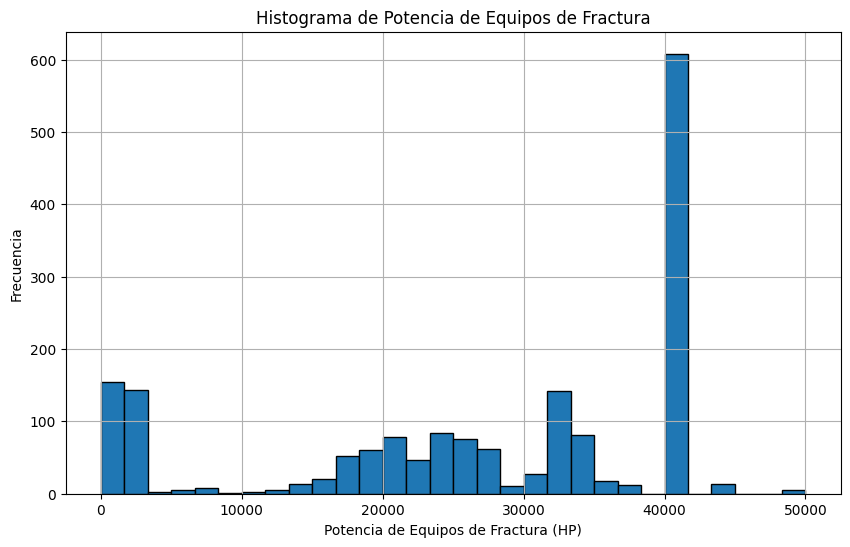

In [20]:
# Crear el histograma para la columna de potencia de equipos de fractura
plt.figure(figsize=(10, 6))
plt.hist(pozos['potencia_equipos_fractura_hp'], bins=30, edgecolor='black')
plt.title('Histograma de Potencia de Equipos de Fractura')
plt.xlabel('Potencia de Equipos de Fractura (HP)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [21]:
# Calcular la moda
mode_value = pozos['potencia_equipos_fractura_hp'].mode()[0]

# Calcular la mediana
median_value = pozos['potencia_equipos_fractura_hp'].median()

# Calcular la media
mean_value = pozos['potencia_equipos_fractura_hp'].mean()

print("Moda:", mode_value)
print("Mediana:", median_value)
print("Media:", mean_value)

Moda: 40000.0
Mediana: 32000.0
Media: 26701.926895196528


In [22]:
pozos['potencia_equipos_fractura_hp'].fillna(pozos['potencia_equipos_fractura_hp'].mode()[0], inplace=True)

In [23]:
pozos['potencia_equipos_fractura_hp'].isna().sum()

0

In [24]:
pozos.isna().sum()

,0
longitud_rama_horizontal_m,0
cantidad_fracturas,0
arena_bombeada_nacional_tn,0
arena_bombeada_importada_tn,0
agua_inyectada_m3,0
presion_maxima_psi,0
potencia_equipos_fractura_hp,0
tipo_reservorio,0


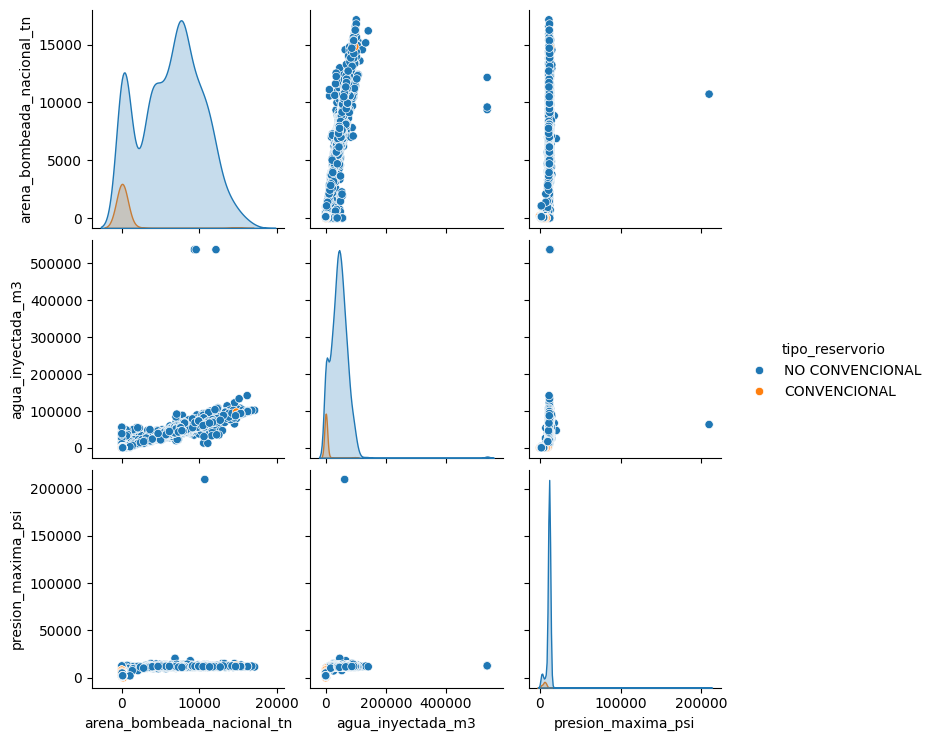

In [25]:
import seaborn as sns
sns.pairplot(pozos, vars=['arena_bombeada_nacional_tn', 'agua_inyectada_m3', 'presion_maxima_psi'], hue='tipo_reservorio')
#sns.boxplot(x='tipo_reservorio', y='arena_bombeada_nacional_tn', data=pozos)

En los gráficos anteriores, se ha identificado la presencia de varios puntos atípicos (outliers), los cuales podrían estar afectando la precisión y representatividad del análisis de datos. Para optimizar el tratamiento de los datos y asegurar resultados más robustos, se procederá a eliminar estos puntos outliers antes de continuar con el análisis. Esta depuración permitirá una interpretación más fiel de las relaciones subyacentes y reducirá el impacto de valores extremos que podrían distorsionar las conclusiones obtenidas.

In [26]:
pozos.describe()

,longitud_rama_horizontal_m,cantidad_fracturas,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,presion_maxima_psi,potencia_equipos_fractura_hp
count,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000
mean,1957.291672,29.158899,6105.204312,512.029991,42264.508369,10742.892479,27082.725171
std,930.887843,16.029468,4120.239860,1155.985257,33168.995066,5446.240439,14022.547348
min,0.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1437.000000,18.000000,2956.904550,0.000000,21851.000000,10896.000000,19547.929410
50%,2090.000000,31.000000,6625.000000,0.000000,42271.368496,11500.141992,32000.000000
75%,2562.000000,40.000000,9144.526500,606.960000,59042.605100,12000.000000,40000.000000
max,4477.000000,87.000000,17146.998000,11839.640000,537184.600000,209640.559334,50000.000000


In [27]:
# Filtrar el DataFrame para eliminar filas donde el valor en 'agua_inyectada' es 537184.6
pozos = pozos[pozos['agua_inyectada_m3'] != 537184.6]

In [28]:
# Filtrar el DataFrame para eliminar filas donde el valor en 'agua_inyectada' es 537184.6
pozos = pozos[pozos['agua_inyectada_m3'] != 537184.6]

In [29]:
# Filtrar el DataFrame para eliminar filas donde el valor en 'presión_maxima_psi' es 209640.559333927
pozos = pozos[pozos['presion_maxima_psi'] != 209640.559333927]

In [30]:
pozos['presion_maxima_psi'].max()

20473.0

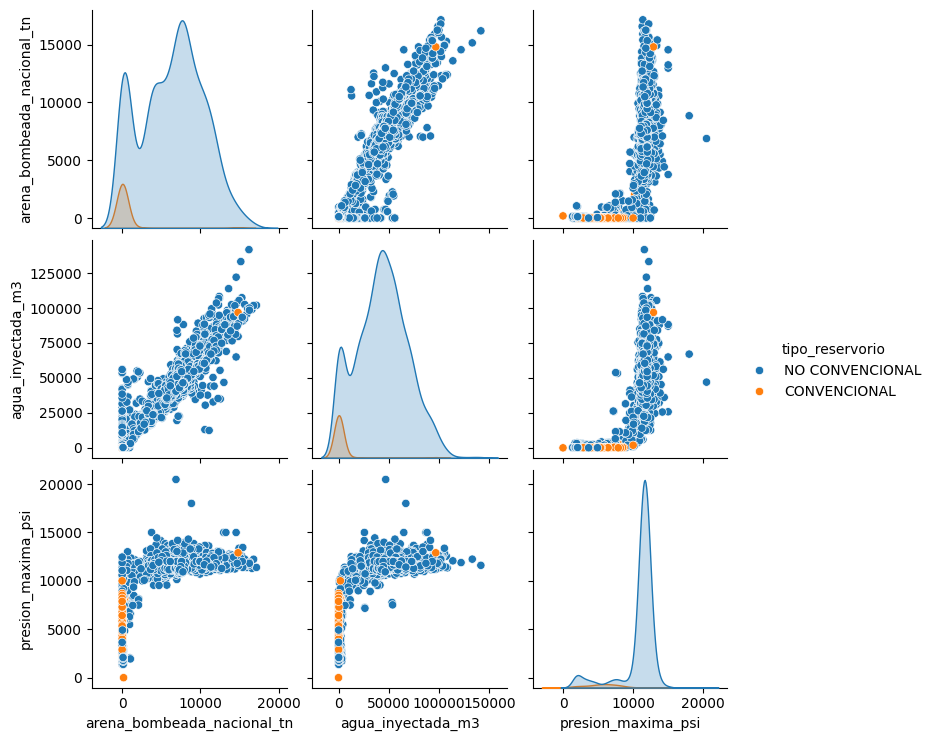

In [31]:
sns.pairplot(pozos, vars=['arena_bombeada_nacional_tn', 'agua_inyectada_m3', 'presion_maxima_psi'], hue='tipo_reservorio')

# Transformación de variables

In [32]:
pozos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1777 entries, 2 to 3752
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitud_rama_horizontal_m    1777 non-null   float64
 1   cantidad_fracturas            1777 non-null   int64  
 2   arena_bombeada_nacional_tn    1777 non-null   float64
 3   arena_bombeada_importada_tn   1777 non-null   float64
 4   agua_inyectada_m3             1777 non-null   float64
 5   presion_maxima_psi            1777 non-null   float64
 6   potencia_equipos_fractura_hp  1777 non-null   float64
 7   tipo_reservorio               1777 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 124.9+ KB


In [33]:
pozos_encoded= pd.get_dummies(pozos, columns=['tipo_reservorio'])

In [34]:
pozos_encoded.shape

(1777, 9)

In [35]:
pozos_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1777 entries, 2 to 3752
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   longitud_rama_horizontal_m       1777 non-null   float64
 1   cantidad_fracturas               1777 non-null   int64  
 2   arena_bombeada_nacional_tn       1777 non-null   float64
 3   arena_bombeada_importada_tn      1777 non-null   float64
 4   agua_inyectada_m3                1777 non-null   float64
 5   presion_maxima_psi               1777 non-null   float64
 6   potencia_equipos_fractura_hp     1777 non-null   float64
 7   tipo_reservorio_CONVENCIONAL     1777 non-null   bool   
 8   tipo_reservorio_NO CONVENCIONAL  1777 non-null   bool   
dtypes: bool(2), float64(6), int64(1)
memory usage: 114.5 KB


In [36]:
numeric_cols = pozos_encoded.select_dtypes(include=[float, int]).columns

In [37]:
numeric_cols

Index(['longitud_rama_horizontal_m', 'cantidad_fracturas',
       'arena_bombeada_nacional_tn', 'arena_bombeada_importada_tn',
       'agua_inyectada_m3', 'presion_maxima_psi',
       'potencia_equipos_fractura_hp'],
      dtype='object')

In [38]:
from sklearn.preprocessing import MinMaxScaler
# Escalar los datos
scaler = MinMaxScaler()
valores_normalizados = scaler.fit_transform(pozos_encoded[numeric_cols])

In [39]:
# Reemplazar columnas escaladas en el DataFrame
pozos_encoded[numeric_cols]= pd.DataFrame(valores_normalizados, columns=numeric_cols, index=pozos_encoded.index)

In [40]:
pozos_encoded.describe()

,longitud_rama_horizontal_m,cantidad_fracturas,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,presion_maxima_psi,potencia_equipos_fractura_hp
count,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000
mean,0.436469,0.326864,0.355479,0.052799,0.292425,0.519109,0.541073
std,0.207737,0.186208,0.240237,0.115702,0.185186,0.133176,0.280498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.320034,0.197674,0.171119,0.000000,0.154187,0.531969,0.390620
50%,0.466312,0.337209,0.385607,0.000000,0.297853,0.561715,0.640000
75%,0.570637,0.453488,0.532001,0.064330,0.415000,0.586138,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
pozos_encoded.head()

,longitud_rama_horizontal_m,cantidad_fracturas,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,presion_maxima_psi,potencia_equipos_fractura_hp,tipo_reservorio_CONVENCIONAL,tipo_reservorio_NO CONVENCIONAL
2,0.320950,0.197674,0.219360,0.057124,0.181936,0.732672,0.64,False,True
3,0.339045,0.209302,0.227661,0.059398,0.193445,0.554291,0.64,False,True
4,0.331003,0.209302,0.230304,0.060643,0.191745,0.541005,0.64,False,True
5,0.317979,0.197674,0.218523,0.058599,0.183953,0.581253,0.64,False,True
6,0.335850,0.209302,0.226457,0.060959,0.195038,0.573927,0.64,False,True


In [42]:
pozos_encoded.shape

(1777, 9)

# Implementacion del modelo

# Kmeans

In [43]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pozos_encoded)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

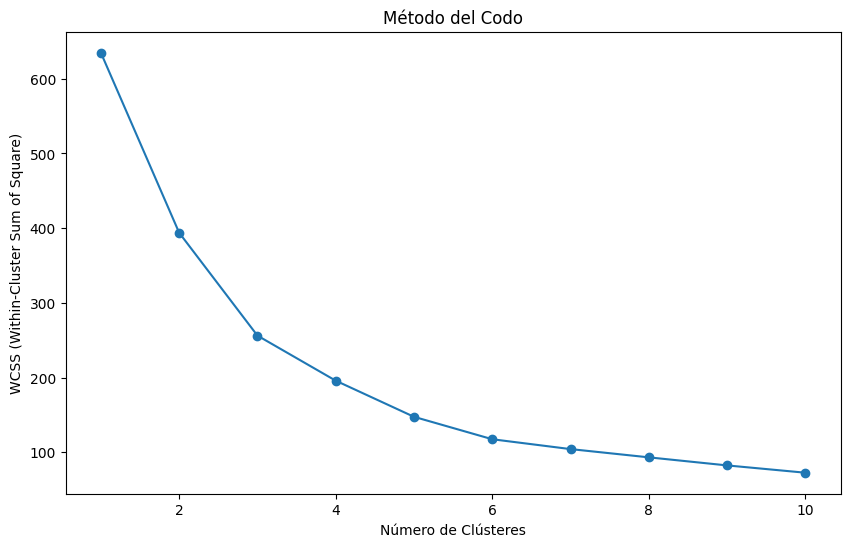

In [44]:
# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.show()

De acuerdo con el análisis del gráfico del codo, no se observa una distinción clara que permita determinar el número óptimo de clusters. Ante esta ambigüedad, se procederá a utilizar el método del coeficiente de silueta para identificar el número adecuado de clusters. Este método evalúa la calidad de los clusters formados, midiendo cuán similares son los objetos dentro del mismo cluster en comparación con aquellos en otros clusters. Al aplicar el método de silueta, se espera obtener un valor más preciso que refleje la estructura interna de los datos y garantice una mejor agrupación.

In [45]:
from sklearn.metrics import silhouette_score
# Rango de número de clústeres a probar
K = range(2, 11)  # Desde 2 hasta 10 clústeres (ajusta según sea necesario)
silhouette_avgs = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(pozos_encoded)

    # Calcular el coeficiente de silueta
    if len(set(clusters)) > 1:  # Asegúrate de que haya más de un clúster
        silhouette_avg = silhouette_score(pozos_encoded, clusters)
    else:
        silhouette_avg = -1  # Valor negativo si no hay suficientes clústeres
    silhouette_avgs.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

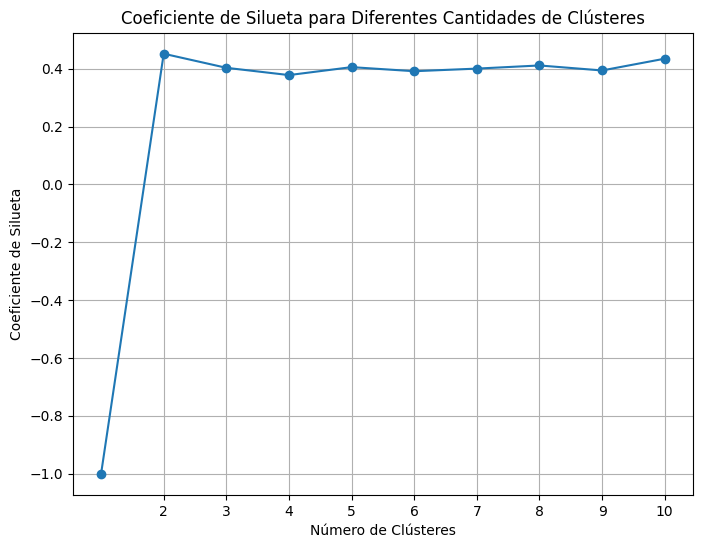

In [46]:
# Graficar el coeficiente de silueta para diferentes números de clústeres
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), silhouette_avgs, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para Diferentes Cantidades de Clústeres')
plt.xticks(K)
plt.grid(True)
plt.show()

In [47]:
# Imprimir el número óptimo de clústeres
optimal_k = range(1, 11)[np.argmax(silhouette_avgs)]
print(f'Número óptimo de clústeres: {optimal_k}')
print(f'Coeficiente de Silueta máximo: {max(silhouette_avgs):.2f}')

Número óptimo de clústeres: 2
Coeficiente de Silueta máximo: 0.45


In [48]:
# Seleccionar el número óptimo de clústeres
numero_clusters = 2
kmeans = KMeans(n_clusters=numero_clusters, random_state=42)
clusters = kmeans.fit_predict(pozos_encoded)

# Agregar los resultados de clusterización al DataFrame original
pozos['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


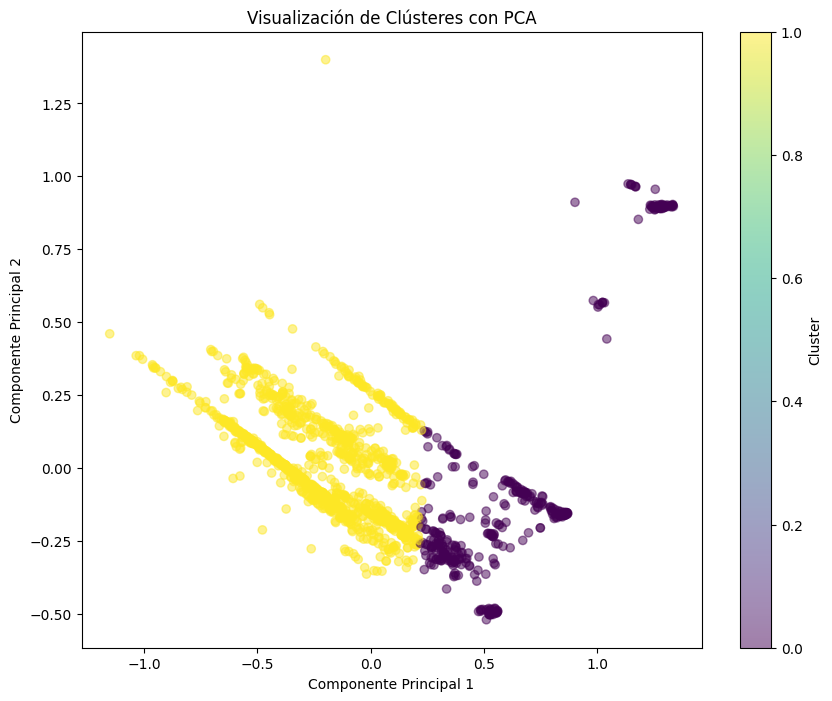

In [49]:
from sklearn.decomposition import PCA

# Reducción de dimensionalidad a 2D para visualización
pca = PCA(n_components=2)
pozos_pca = pca.fit_transform(pozos_encoded)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pozos_pca[:, 0], pozos_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Clústeres con PCA')
plt.show()

In [50]:
# Imprime las componentes principales
print("Componentes principales (vectores propios):")
print(pca.components_)

Componentes principales (vectores propios):
[[-0.42080029 -0.37418952 -0.47703627  0.04068742 -0.37040956 -0.22608268
  -0.39200137  0.23633509 -0.23633509]
 [ 0.17825396  0.22451358  0.34121091 -0.17009245  0.21563347  0.00688403
  -0.40901026  0.52850178 -0.52850178]]


In [51]:
# Muestra la varianza explicada por cada componente
print("\nVarianza explicada por cada componente:")
print(pca.explained_variance_ratio_)


Varianza explicada por cada componente:
[0.58087575 0.18614061]


In [52]:
# Muestra la importancia (carga) de cada columna en cada componente principal
print("\nCargas de cada característica en cada componente:")
for i, component in enumerate(pca.components_):
    print(f"Componente {i+1}:")
    for j, value in enumerate(component):
        print(f"{pozos_encoded.columns[j]}: {value}")


Cargas de cada característica en cada componente:
Componente 1:
longitud_rama_horizontal_m: -0.42080029435716276
cantidad_fracturas: -0.3741895171734273
arena_bombeada_nacional_tn: -0.47703627325797826
arena_bombeada_importada_tn: 0.04068742453147477
agua_inyectada_m3: -0.37040956312029777
presion_maxima_psi: -0.2260826839679743
potencia_equipos_fractura_hp: -0.39200137011461766
tipo_reservorio_CONVENCIONAL: 0.23633508666161607
tipo_reservorio_NO CONVENCIONAL: -0.23633508666161612
Componente 2:
longitud_rama_horizontal_m: 0.17825396238621163
cantidad_fracturas: 0.22451358120524106
arena_bombeada_nacional_tn: 0.34121091425907046
arena_bombeada_importada_tn: -0.1700924458607126
agua_inyectada_m3: 0.2156334670741601
presion_maxima_psi: 0.006884030100913589
potencia_equipos_fractura_hp: -0.4090102624557935
tipo_reservorio_CONVENCIONAL: 0.5285017842035217
tipo_reservorio_NO CONVENCIONAL: -0.5285017842035218


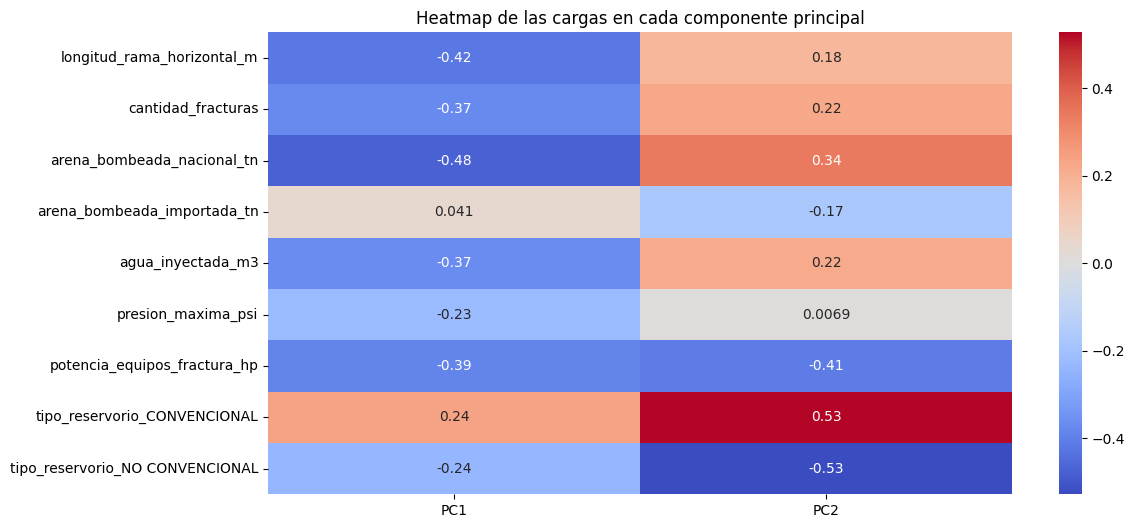

In [53]:
#Crea un DataFrame con las cargas de cada característica
pesos = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=pozos_encoded.columns)

# Crea un heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pesos, annot=True, cmap='coolwarm')
plt.title('Heatmap de las cargas en cada componente principal')
plt.show()

Signo de la carga:

Negativo: Una carga negativa indica que a medida que esa variable aumenta, la componente principal disminuye. Es decir, hay una relación inversa entre la variable y la componente principal.
Positivo: Una carga positiva indica que a medida que esa variable aumenta, la componente principal también aumenta. Magnitud de la carga:

Mayor magnitud: Las variables con mayores valores absolutos en su carga tienen una mayor influencia en la componente principal.
Menor magnitud: Las variables con valores absolutos pequeños tienen una menor influencia en la componente principal.

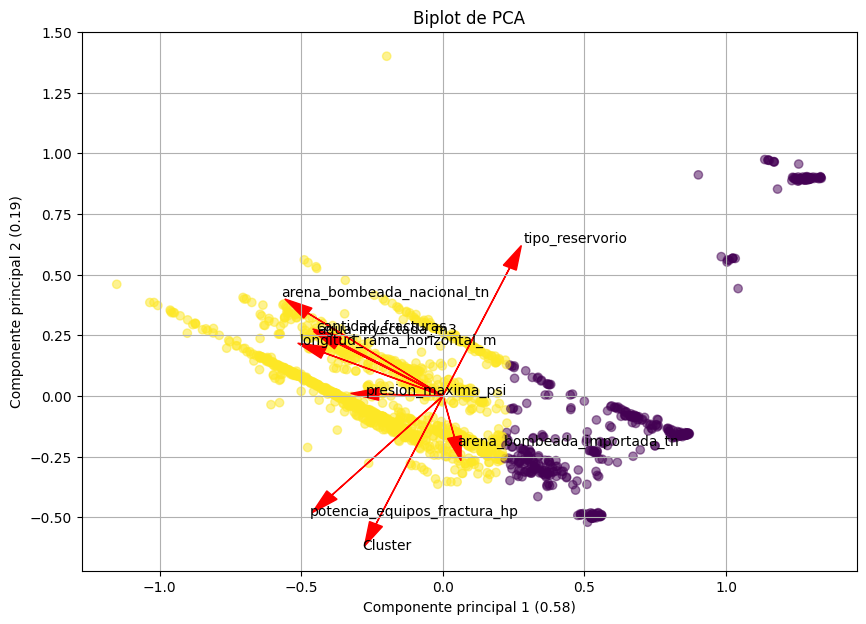

In [54]:
# Crea un biplot
plt.figure(figsize=(10, 7))
plt.scatter(pozos_pca[:, 0], pozos_pca[:, 1], c=clusters, cmap= 'viridis', alpha=0.5)
for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, pc1, pc2, color='r', head_width=0.05, head_length=0.1)
    plt.text(pc1 * 1.2, pc2 * 1.2, pozos.columns[i], color='k')
plt.xlabel(f'Componente principal 1 ({pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'Componente principal 2 ({pca.explained_variance_ratio_[1]:.2f})')
plt.title('Biplot de PCA')
plt.grid()
plt.show()

Este gráfico muestra las proyecciones de los datos en el plano de las dos primeras componentes principales, junto con flechas que representan las cargas de las características originales en estas componentes.
Las flechas apuntan en la dirección de mayor variabilidad explicada por cada componente.

### Análisis de Componentes Principales (PCA)

Con la información adicional sobre las cargas de cada característica en las componentes principales, se presenta un análisis más detallado sobre lo que cada componente está representando en el contexto del dataset.  


#### Componente 1:
 **Varianza Explicada**:   
El **Componente Principal 1 (PC1)** explica el 58.91% de la varianza total en los datos, lo que lo convierte en el componente más importante para capturar la variabilidad en el dataset. Este componente está fuertemente influenciado por:

## Variables más influyentes en la Componente Principal 1

-**Variables con mayor carga negativa:**

- **arena_bombeada_nacional_tn** (-0.477) tiene la carga negativa más fuerte, indicando que es la variable que más contribuye en sentido inverso a la componente.
- **longitud_rama_horizontal_m** (-0.421) y **potencia_equipos_fractura_hp** (-0.392) también tienen una gran influencia negativa.
- **cantidad_fracturas** (-0.374) y **agua_inyectada_m3** (-0.370) son otras variables con un fuerte efecto negativo.

-**Variables con menor influencia:**

- **arena_bombeada_importada_tn** (0.041) tiene una carga muy cercana a cero, lo que indica que su influencia en la componente es mínima.
- **presion_maxima_psi** (-0.226) tiene una influencia moderada pero menos significativa que las demás variables mencionadas.

-**Variables con influencia positiva:**

- **tipo_reservorio_CONVENCIONAL** (0.236) tiene una influencia positiva, lo que sugiere que los reservorios convencionales tienden a aumentar la componente.
- **tipo_reservorio_NO CONVENCIONAL** (-0.236) tiene la misma magnitud pero en sentido contrario, lo que sugiere que los reservorios no convencionales tienden a reducir la componente.

#### Interpretación Global de la componente 1

La Componente Principal 1 parece representar principalmente las características físicas del pozo (longitud de la rama, cantidad de fracturas, arena bombeada, agua inyectada, potencia de los equipos) con el tipo de reservorio.

- Los reservorios convencionales se asocian con valores positivos de la componente, mientras que los no convencionales con valores negativos.
- La componente captura la variabilidad de cómo la infraestructura del pozo y las operaciones de fractura están relacionadas con el tipo de reservorio. Los pozos con mayores valores negativos en esta componente probablemente estén asociados con operaciones más intensivas en cuanto a infraestructura y recursos (debido a las grandes cargas negativas en variables como **arena_bombeada_nacional_tn**, **longitud_rama_horizontal_m**, etc.).
  
la Componente Principal 1 podría estar diferenciando entre distintos perfiles de operación en los pozos, quizás entre aquellos que requieren más recursos (más arena, mayor longitud de rama, más potencia) y el tipo de reservorio.



#### Componente 2:
**Varianza Explicada**:   
**Componente Principal 2 (PC2)** explica el 18.76% de la varianza total en los datos, lo que lo convierte en el segundo componente más importante. Este componente está influenciado principalmente por:

- **Variables con mayor carga positiva:**
  - `tipo_reservorio_CONVENCIONAL (0.529)` tiene la mayor carga positiva, lo que indica que los pozos en reservorios convencionales tienden a aumentar esta componente.
  - `arena_bombeada_nacional_tn (0.341)` y `cantidad_fracturas (0.225)` también contribuyen significativamente de manera positiva.
  - `longitud_rama_horizontal_m (0.178)` y `agua_inyectada_m3 (0.216)` tienen una influencia positiva moderada.

- **Variables con carga negativa:**
  - `tipo_reservorio_NO CONVENCIONAL (-0.529)` tiene la carga negativa más fuerte, sugiriendo que los reservorios no convencionales disminuyen esta componente.
  - `potencia_equipos_fractura_hp (-0.409)` es la siguiente en importancia, indicando que una mayor potencia de los equipos de fractura está relacionada con una disminución de esta componente.
  - `arena_bombeada_importada_tn (-0.170)` también tiene una carga negativa, aunque su influencia es menor comparada con las demás variables.

#### Interpretación Global de la Componente Principal 2

- Diferenciación de Reservorios: Componente 2 también diferencia entre reservorios convencionales y no convencionales, pero lo hace de manera más marcada, ya que las cargas de `tipo_reservorio_CONVENCIONAL` y `tipo_reservorio_NO CONVENCIONAL` son las más grandes (positiva y negativa, respectivamente).

- **Asociación con la arena bombeada y la fractura:**
  - Esta componente parece estar relacionada con la cantidad de **arena bombeada nacional** y la **cantidad de fracturas**. Los pozos con mayor arena bombeada nacional y mayor cantidad de fracturas tienen valores más altos en esta componente.
  - La **potencia de los equipos de fractura** tiene una fuerte carga negativa, lo que sugiere que, para esta componente, los pozos con menor potencia de fractura tienden a estar asociados con valores más altos de la componente.



Comparación y Relación entre las Componentes 1 y 2

- **Similaridades:**
  - Ambas componentes están fuertemente influenciadas por el tipo de reservorio, con los valores de `tipo_reservorio_CONVENCIONAL` y `tipo_reservorio_NO CONVENCIONAL` siendo clave en ambas. Esto sugiere que el tipo de reservorio es una característica crítica que distingue entre los pozos.
  
- **Diferencias:**
  - **Componente 1** se enfoca más en las variables relacionadas con la **infraestructura y recursos** del pozo (como la longitud de la rama horizontal y la cantidad de arena bombeada nacional).
  - **Componente 2**, por otro lado, parece diferenciar más fuertemente entre **reservorios convencionales y no convencionales** y se asocia con la cantidad de arena bombeada nacional y la potencia de los equipos de fractura.





# Conclusión General:
El análisis de los vectores propios y las cargas de cada característica en las componentes principales sugiere que:

Las dos componentes principales capturan diferentes aspectos de la variabilidad en los datos:

- **Componente 1**: Está más relacionada con las características físicas y operativas generales de los pozos, siendo especialmente relevante la arena bombeada nacional y la longitud de la rama horizontal, con una diferenciación entre reservorios convencionales y no convencionales.

- **Componente 2**: Realza la distinción entre tipos de reservorios, con un enfoque en cómo estos tipos se asocian con la cantidad de arena bombeada (especialmente la nacional) y la potencia de los equipos de fractura.

#### Análisis de Clustering
- **Número óptimo de clústeres:** 2
- **Coeficiente de Silueta máximo:** 0.46

Se realizó un análisis de clustering para identificar patrones en los datos utilizando los componentes principales como base. El análisis reveló que el número óptimo de clústeres es **2**, con un coeficiente de silueta máximo de **0.46**, lo que sugiere una separación moderada entre los clústeres.

- **Clúster 1**: Agrupa pozos que tienden a tener una mayor intensidad en las operaciones de fracturación hidráulica, caracterizados por valores negativos en **PC1**.
- **Clúster 2**: Agrupa pozos asociados con reservorios convencionales y operaciones menos intensivas, con valores positivos en **PC2**.

Estos clústeres permiten identificar y diferenciar los pozos en función de la escala de las operaciones y el tipo de reservorio.